<a href="https://colab.research.google.com/github/tantn89/World-Happiness-Report/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import numpy as np

# Load the datasets into Pandas DataFrames
df_2015 = pd.read_csv('https://raw.githubusercontent.com/tantn89/World-Happiness-Report/main/2015.csv')
df_2016 = pd.read_csv('https://raw.githubusercontent.com/tantn89/World-Happiness-Report/main/2016.csv')
df_2017 = pd.read_csv('https://raw.githubusercontent.com/tantn89/World-Happiness-Report/main/2017.csv')
df_2018 = pd.read_csv('https://raw.githubusercontent.com/tantn89/World-Happiness-Report/main/2018.csv')
df_2019 = pd.read_csv('https://raw.githubusercontent.com/tantn89/World-Happiness-Report/main/2019.csv')

# Clean Data

## Add Region Column

In [ ]:
# Function to map countries to regions
def map_country_to_region(country, region_mapping):
    if country in region_mapping:
        return region_mapping[country]
    else:
        return None

# Create a region mapping dictionary using the 2015 dataset
region_mapping = dict(__builtins__.zip(df_2015['Country'], df_2015['Region']))

# Add 'Region' columns to the 2016, 2017, 2018 and 2019 datasets using the region mapping
df_2016['Region'] = df_2016['Country'].apply(lambda x: map_country_to_region(x, region_mapping))
df_2017['Region'] = df_2017['Country'].apply(lambda x: map_country_to_region(x, region_mapping))
df_2018['Region'] = df_2018['Country or region'].apply(lambda x: map_country_to_region(x, region_mapping))
df_2019['Region'] = df_2019['Country or region'].apply(lambda x: map_country_to_region(x, region_mapping))

# Specify the columns to keep
columns_to_keep = [
    'Country', 'Region', 'Rank', 'Score', 'Economy (GDP per Capita)', 'Life Expectancy', 'Freedom', 'Trust (Government Corruption)', 'Generosity'
]

# Standardize column names across datasets
column_mapping = {
    'Happiness Rank': 'Rank',
    'Happiness.Rank': 'Rank',
    'Overall rank': 'Rank',
    'Happiness.Score': 'Score',
    'Happiness Score': 'Score',
    'Country or region': 'Country',
    'GDP per capita': 'Economy (GDP per Capita)',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Health (Life Expectancy)': 'Life Expectancy',
    'Healthy life expectancy': 'Life Expectancy',
    'Health..Life.Expectancy.': 'Life Expectancy',
    'Freedom to make life choices': 'Freedom',
    'Freedom..to.make.life.choices.': 'Freedom',
    'Trust (Government Corruption)': 'Trust (Government Corruption)',
    'Perceptions of corruption': 'Trust (Government Corruption)',
    'Trust..Government.Corruption.': 'Trust (Government Corruption)',
}

# Rename columns and keep only the necessary ones
df_2015 = df_2015.rename(columns=column_mapping)[columns_to_keep]
df_2016 = df_2016.rename(columns=column_mapping)[columns_to_keep]
df_2017 = df_2017.rename(columns=column_mapping)[columns_to_keep]
df_2018 = df_2018.rename(columns=column_mapping)[columns_to_keep]
df_2019 = df_2019.rename(columns=column_mapping)[columns_to_keep]

# Add a 'Year' column to each dataset
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018
df_2019['Year'] = 2019

# Concatenate datasets into a single DataFrame
df_all_years = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], axis=0, ignore_index=True)

## Fill Missing Value In Region Column

In [ ]:
# Find missing values in the DataFrame
missing_values = df_all_years.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Country                           0
Region                           25
Rank                              0
Score                             0
Economy (GDP per Capita)          0
Life Expectancy                   0
Freedom                           0
Trust (Government Corruption)     1
Generosity                        0
Year                              0
dtype: int64


In [ ]:
# Find countries with missing regions
missing_regions = df_all_years[df_all_years['Region'].isnull()]['Country'].unique()
print("Countries with missing regions:", missing_regions)

Countries with missing regions: ['Puerto Rico' 'Belize' 'Somalia' 'Somaliland Region' 'Namibia'
 'South Sudan' 'Taiwan Province of China' 'Hong Kong S.A.R., China'
 'Trinidad & Tobago' 'Northern Cyprus' 'North Macedonia' 'Gambia']


In [ ]:
# Fill missing regions manually based on the countries
country_to_region = {
    'Puerto Rico': 'Latin America and Caribbean',
    'Belize': 'Latin America and Caribbean',
    'Somalia': 'Sub-Saharan Africa',
    'Somaliland Region': 'Sub-Saharan Africa',
    'Namibia': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Taiwan Province of China': 'Eastern Asia ',
    'Hong Kong S.A.R., China': 'Eastern Asia',
    'Trinidad & Tobago': 'Southern Caribbean',
    'Northern Cyprus': 'Eastern Mediterranean',
    'North Macedonia': 'Southeastern Europe',
    'Gambia': 'West Africa'
}

# Fill missing regions in the DataFrame
for country, region in country_to_region.items():
    mask = (df_all_years['Country'] == country) & (df_all_years['Region'].isnull())
    df_all_years.loc[mask, 'Region'] = region

# Check if there are any remaining missing regions
missing_regions_filled = df_all_years['Region'].isnull().sum()
print("Missing regions after filling:", missing_regions_filled)

Missing regions after filling: 0


## Fill Missing Value In Trust (Government Corruption) Column



In [ ]:
# Find the mean value of the 'Trust (Government Corruption)' column
mean_trust = df_all_years['Trust (Government Corruption)'].mean()

# Fill the missing value with the mean value
df_all_years['Trust (Government Corruption)'].fillna(mean_trust, inplace=True)

# Check if there are any remaining missing values in the column
missing_trust = df_all_years['Trust (Government Corruption)'].isnull().sum()
print("Missing values in 'Trust (Government Corruption)' after filling:", missing_trust)

Missing values in 'Trust (Government Corruption)' after filling: 0


## Download File

In [ ]:
# Save the df_all_years DataFrame to a CSV file
df_all_years.to_csv('happiness_all_years.csv', index=False)

# Loop through unique years
for year in df_all_years['Year'].unique():
    # Filter df_all_years for the specific year
    df_year = df_all_years[df_all_years['Year'] == year]

    # Save the year-specific DataFrame as a CSV file
    filename = f'happiness_data_{int(year)}.csv'
    df_year.to_csv(filename, index=False)

# For Google Colab:
from google.colab import files
import zipfile

# Create a list of filenames to download
filenames = [
    'happiness_all_years.csv', 'happiness_data_2015.csv', 'happiness_data_2016.csv',
     'happiness_data_2017.csv', 'happiness_data_2018.csv', 'happiness_data_2019.csv'
]

# Create a zip file containing the files
with zipfile.ZipFile('happiness_files.zip', 'w') as zip:
    for file in filenames:
        zip.write(file)

# Download the zip file
files.download('happiness_files.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visualize Data

## What are the key differences between the top and bottom ranked countries in terms of happiness?

            Score  Economy (GDP per Capita)  Life Expectancy  Freedom  \
Top 10     7.4559                    1.3870           1.0177   0.5786   
Bottom 10  3.3041                    0.3978           0.4259   0.2287   

           Trust (Government Corruption)  Generosity  
Top 10                            0.3190      0.2741  
Bottom 10                         0.1226      0.2189  


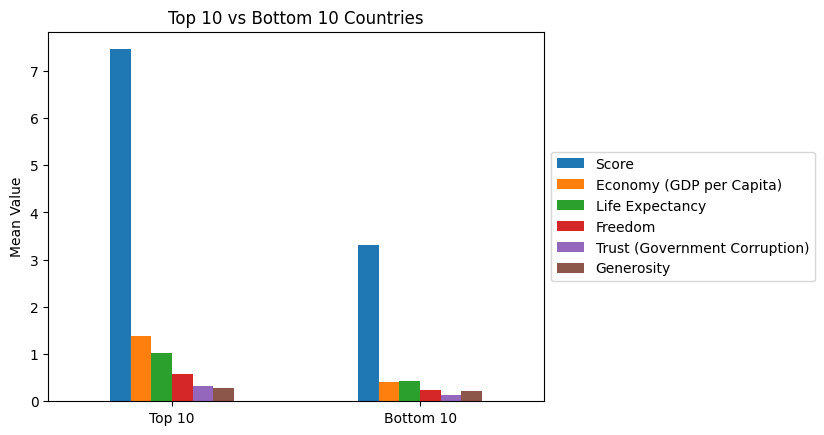

In [ ]:
# Get the top and bottom ranked countries in 2019
top_countries = df_2019.nlargest(10, 'Score')
bottom_countries = df_2019.nsmallest(10, 'Score')

# Compare the mean of each feature
comparison = pd.DataFrame(index=['Top 10', 'Bottom 10'])
comparison['Score'] = [top_countries['Score'].mean(), bottom_countries['Score'].mean()]
comparison['Economy (GDP per Capita)'] = [top_countries['Economy (GDP per Capita)'].mean(), bottom_countries['Economy (GDP per Capita)'].mean()]
comparison['Life Expectancy'] = [top_countries['Life Expectancy'].mean(), bottom_countries['Life Expectancy'].mean()]
comparison['Freedom'] = [top_countries['Freedom'].mean(), bottom_countries['Freedom'].mean()]
comparison['Trust (Government Corruption)'] = [top_countries['Trust (Government Corruption)'].mean(), bottom_countries['Trust (Government Corruption)'].mean()]
comparison['Generosity'] = [top_countries['Generosity'].mean(), bottom_countries['Generosity'].mean()]

# Display the comparison
print(comparison)

# Visualize the comparison
comparison.plot(kind='bar', title='Top 10 vs Bottom 10 Countries')
plt.xticks(rotation=0)
plt.ylabel('Mean Value')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

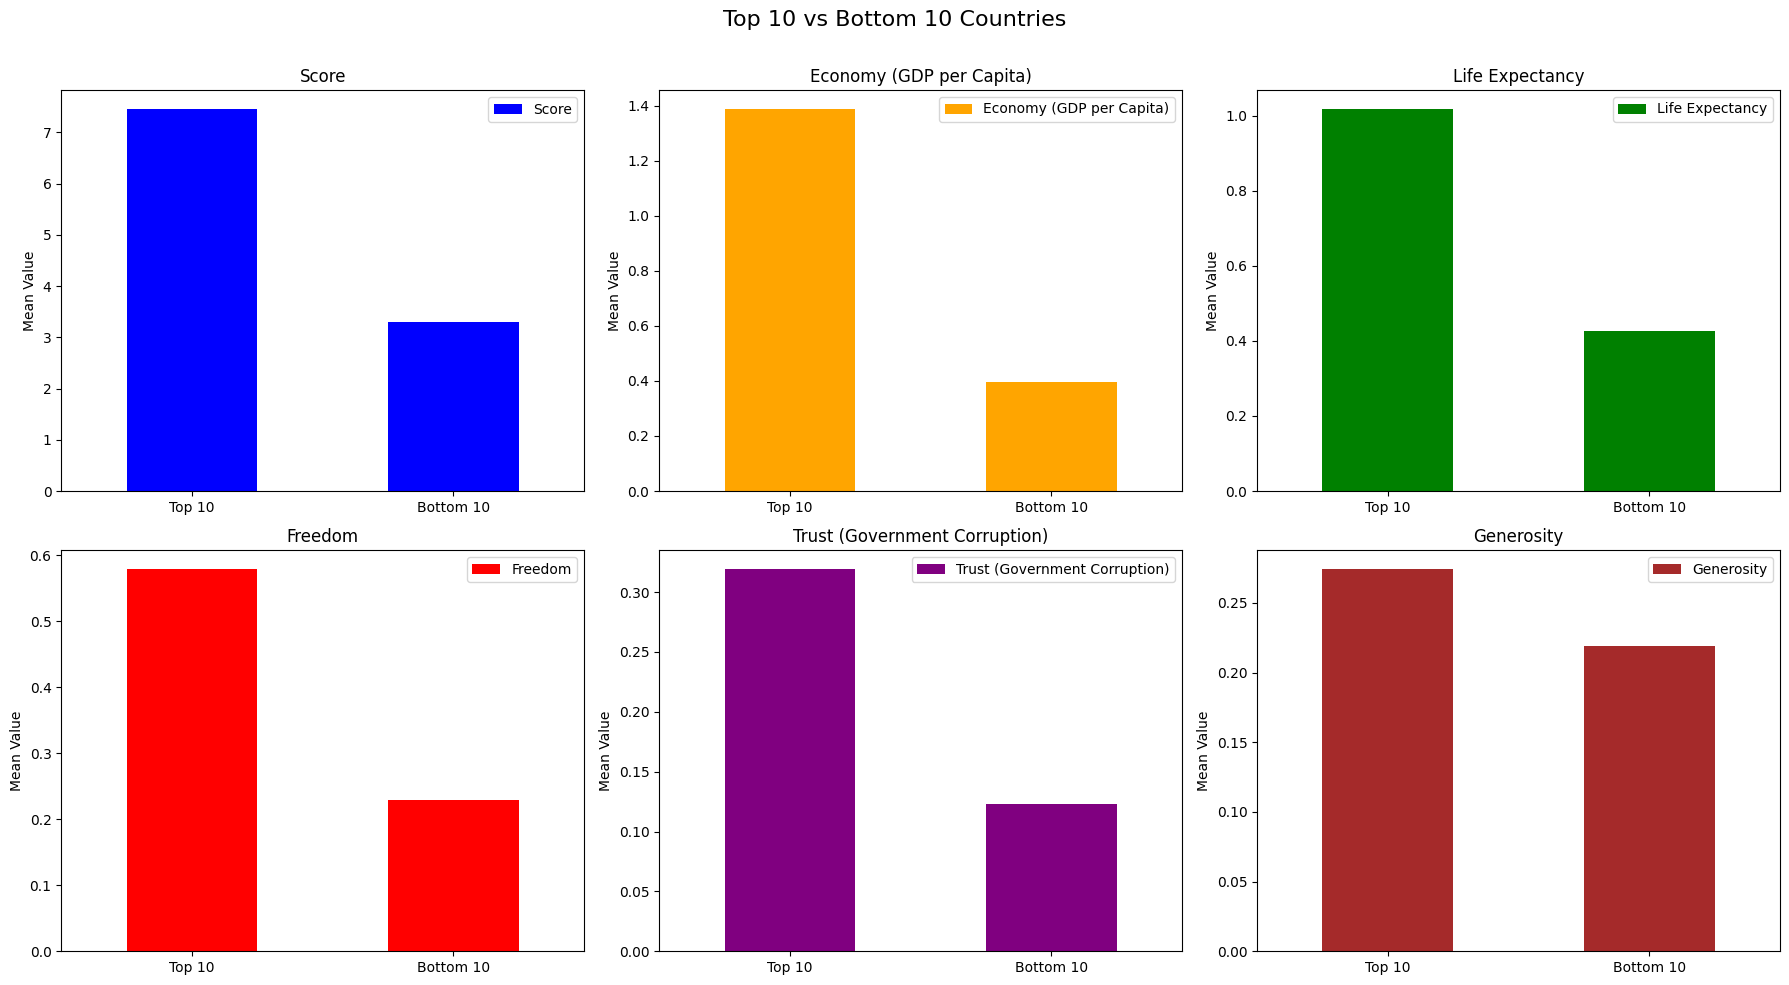

In [ ]:
# Create a list of features to compare
features = ['Score', 'Economy (GDP per Capita)', 'Life Expectancy', 'Freedom', 'Trust (Government Corruption)', 'Generosity']

# Initialize the figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Top 10 vs Bottom 10 Countries', fontsize=16)

# Iterate through the features and create bar charts
for index, feature in enumerate(features):
    row = index // 3
    col = index % 3
    comparison = pd.DataFrame(index=['Top 10', 'Bottom 10'])
    comparison[feature] = [top_countries[feature].mean(), bottom_countries[feature].mean()]
    comparison.plot(kind='bar', ax=axes[row, col], title=feature)
    axes[row, col].set_xticklabels(['Top 10', 'Bottom 10'], rotation=0)
    axes[row, col].set_ylabel('Mean Value')

# Adjust the layout and display the charts
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## Correlation

### Heatmap

<ipython-input-34-c0ebc2e01692>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix_all_years = df_all_years.corr()


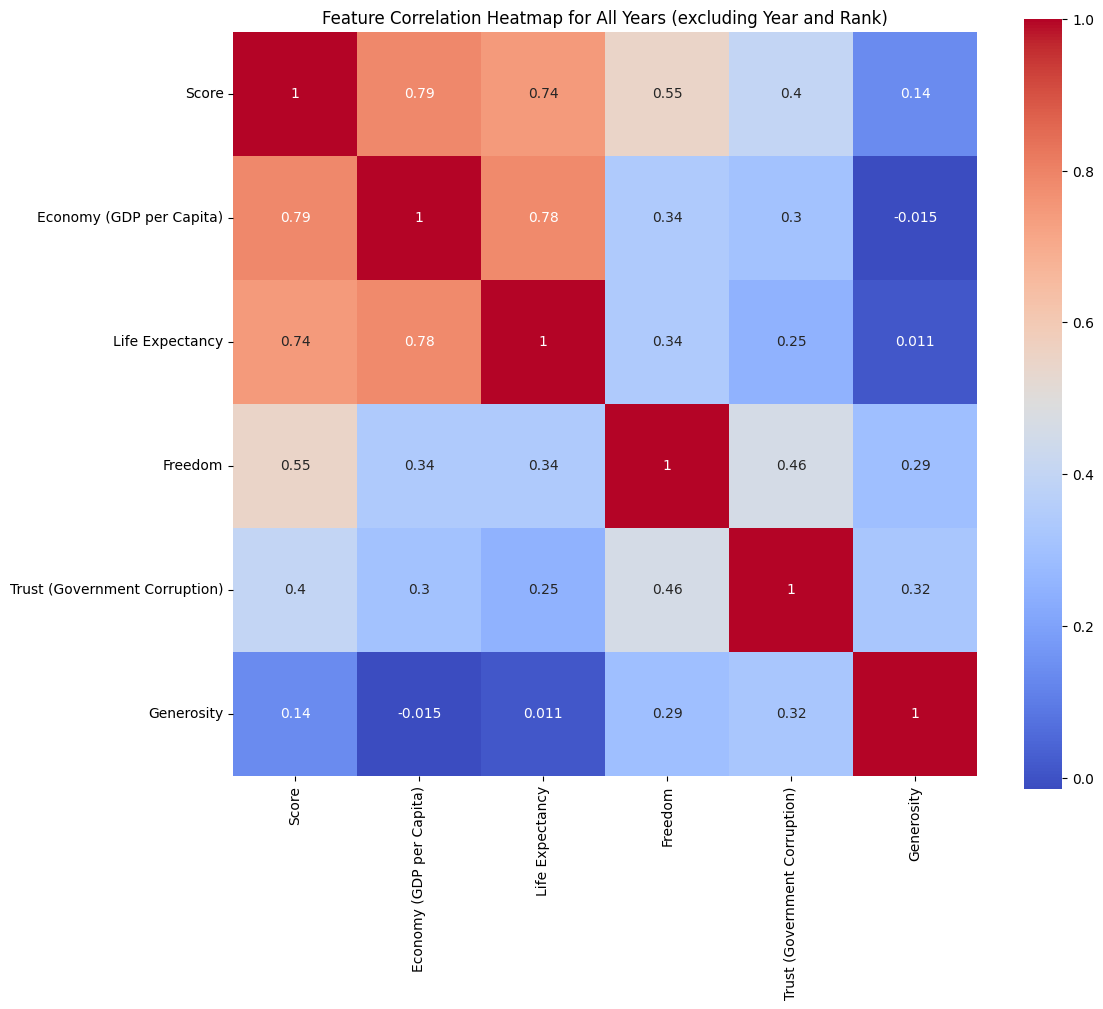

In [ ]:
# Calculate the correlation matrix for the df_all_years DataFrame
corr_matrix_all_years = df_all_years.corr()

# Drop the 'Year' and 'Rank' columns from the correlation matrix
corr_matrix_all_years = corr_matrix_all_years.drop(['Year', 'Rank'], axis=0).drop(['Year', 'Rank'], axis=1)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_all_years, annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap for All Years (excluding Year and Rank)')
plt.show()

### Correlation Of Happiness Score with Each Factor Each Year

<ipython-input-35-960806a58b6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_by_year = df_all_years.groupby('Year').apply(lambda x: x.corr()['Score'])


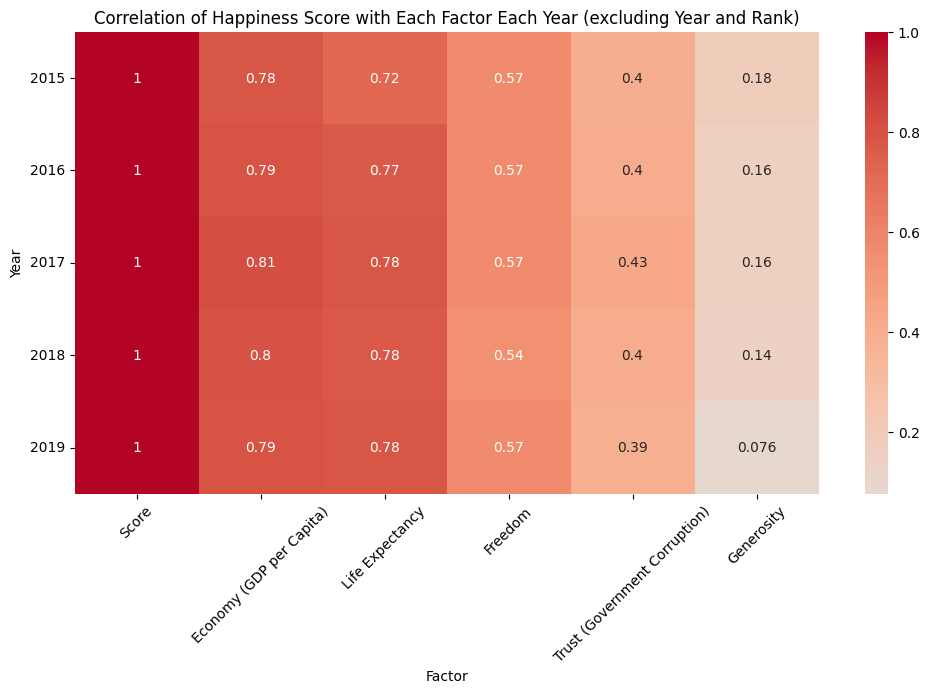

In [ ]:
# Calculate the correlation coefficients for each year
correlations_by_year = df_all_years.groupby('Year').apply(lambda x: x.corr()['Score'])

# Drop the 'Year' and 'Rank' columns from the correlations_by_year
correlations_by_year = correlations_by_year.drop(['Year', 'Rank'], axis=1)

# Set up the plot
plt.figure(figsize=(12, 6))

# Create the heatmap
sns.heatmap(correlations_by_year, annot=True, cmap="coolwarm", center=0)

# Customize the plot
plt.title("Correlation of Happiness Score with Each Factor Each Year (excluding Year and Rank)")
plt.xlabel("Factor")
plt.ylabel("Year")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Display the plot
plt.show()

## How has happiness evolved over time globally, regionally, and within specific countries?

### Global

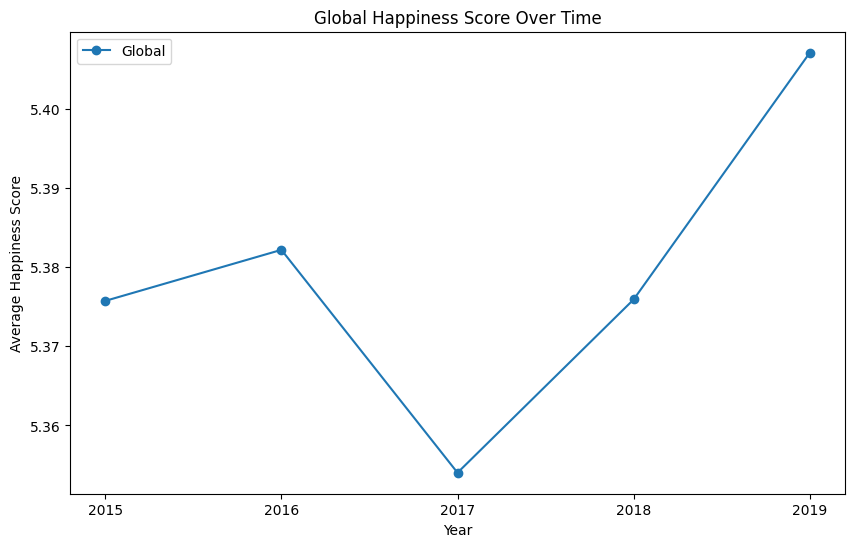

In [ ]:
# Calculate the average happiness score for each year globally:
global_avg_scores = df_all_years.groupby('Year')['Score'].mean().reset_index()

# Visualize the trends using line plots:
plt.figure(figsize=(10, 6))
plt.plot(global_avg_scores['Year'], global_avg_scores['Score'], label='Global', marker='o')
plt.title('Global Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.xticks(global_avg_scores['Year'].unique())  # Set x-ticks to display only integer years
plt.legend()
plt.show()

### Region

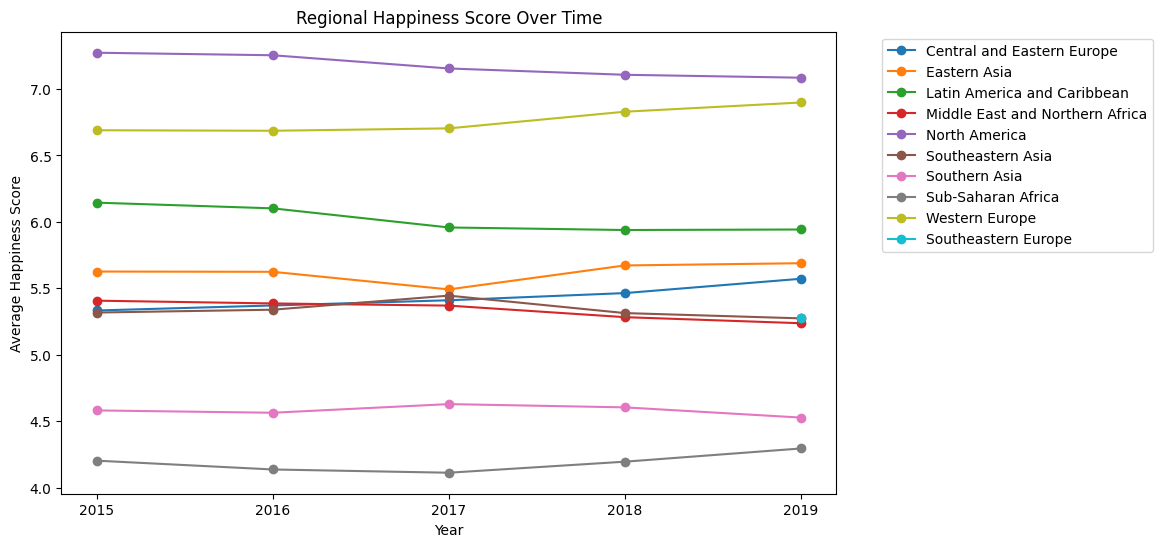

In [ ]:
# Calculate the average happiness score for each year and region:
regional_avg_scores = df_all_years.groupby(['Year', 'Region'])['Score'].mean().reset_index()

# List of regions to keep
selected_regions = [
    'Central and Eastern Europe',
    'Western Europe',
    'Southeastern Europe',
    'Eastern Asia',
    'Southern Asia',
    'Southeastern Asia',
    'Middle East and Northern Africa',
    'Sub-Saharan Africa',
    'North America',
    'Latin America and Caribbean',
]

# Filter the regional_avg_scores DataFrame
filtered_regional_avg_scores = regional_avg_scores[regional_avg_scores['Region'].isin(selected_regions)]

plt.figure(figsize=(10, 6))
for region in filtered_regional_avg_scores['Region'].unique():
    region_data = filtered_regional_avg_scores[filtered_regional_avg_scores['Region'] == region]
    plt.plot(region_data['Year'], region_data['Score'], label=region, marker='o')
plt.title('Regional Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.xticks(global_avg_scores['Year'].unique())  # Set x-ticks to display only integer years
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Selected Countries

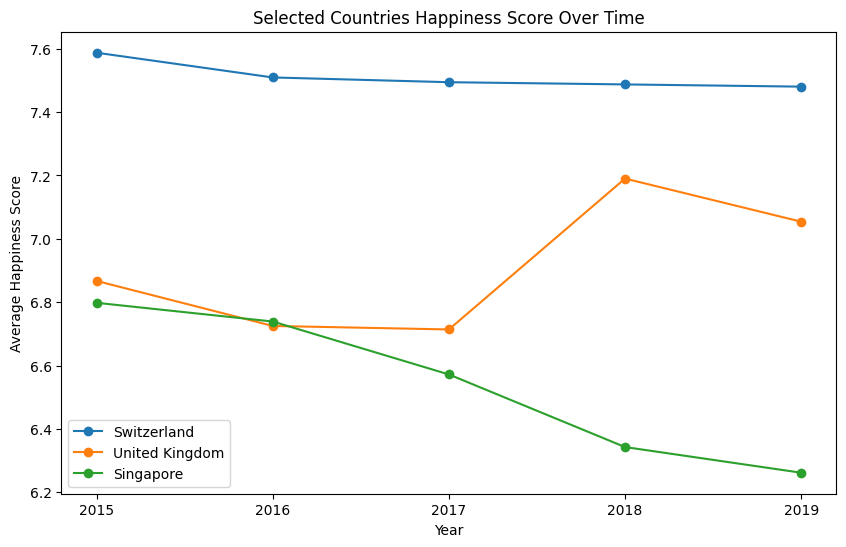

In [ ]:
# Choose specific countries you are interested in analyzing and calculate the average happiness score for each year:
selected_countries = ['Switzerland', 'United Kingdom', 'Singapore']  # Replace with the countries you want to analyze
country_avg_scores = df_all_years[df_all_years['Country'].isin(selected_countries)].groupby(['Year', 'Country'])['Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
for country in selected_countries:
    country_data = country_avg_scores[country_avg_scores['Country'] == country]
    plt.plot(country_data['Year'], country_data['Score'], label=country, marker='o')
plt.title('Selected Countries Happiness Score Over Time')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.xticks(country_avg_scores['Year'].unique())  # Set x-ticks to display only integer years
plt.legend()
plt.show()

### Analyze the downtrend of Singapore

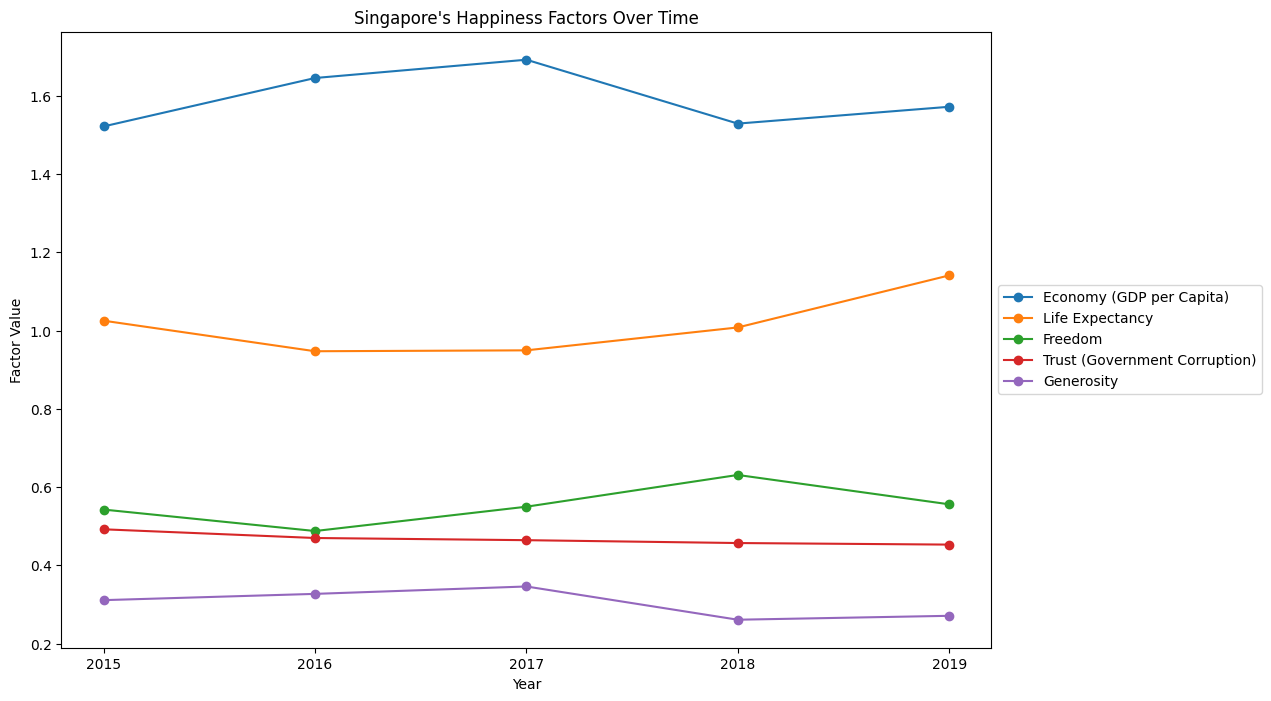

In [ ]:
# Filter Singapore's data from the df_all_years DataFrame
singapore_data = df_all_years[df_all_years['Country'] == 'Singapore']

# Drop unnecessary columns
singapore_data = singapore_data.drop(['Country', 'Region', 'Rank', 'Score'], axis=1)

# Set the index to 'Year'
singapore_data.set_index('Year', inplace=True)

# Plot the trends in contributing factors
singapore_data.plot(kind='line', marker='o', figsize=(12, 8), title="Singapore's Happiness Factors Over Time")
plt.xticks(singapore_data.index.unique())
plt.xlabel('Year')
plt.ylabel('Factor Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

## Analysis top 10 happiest countries

### Top 10 happiest countries for each year

In [ ]:
# Get the top 10 happiest countries for each year
top_10_countries_by_year = df_all_years.groupby('Year').apply(lambda x: x.nlargest(10, 'Score')).reset_index(drop=True)

# Display the top 10 countries for each year
for year in top_10_countries_by_year['Year'].unique():
    print(f"Top 10 happiest countries in {int(year)}:")
    print(top_10_countries_by_year[top_10_countries_by_year['Year'] == year][['Country', 'Score']].reset_index(drop=True))
    print("\n")

Top 10 happiest countries in 2015:
       Country  Score
0  Switzerland  7.587
1      Iceland  7.561
2      Denmark  7.527
3       Norway  7.522
4       Canada  7.427
5      Finland  7.406
6  Netherlands  7.378
7       Sweden  7.364
8  New Zealand  7.286
9    Australia  7.284


Top 10 happiest countries in 2016:
       Country  Score
0      Denmark  7.526
1  Switzerland  7.509
2      Iceland  7.501
3       Norway  7.498
4      Finland  7.413
5       Canada  7.404
6  Netherlands  7.339
7  New Zealand  7.334
8    Australia  7.313
9       Sweden  7.291


Top 10 happiest countries in 2017:
       Country  Score
0       Norway  7.537
1      Denmark  7.522
2      Iceland  7.504
3  Switzerland  7.494
4      Finland  7.469
5  Netherlands  7.377
6       Canada  7.316
7  New Zealand  7.314
8       Sweden  7.284
9    Australia  7.284


Top 10 happiest countries in 2018:
       Country  Score
0      Finland  7.632
1       Norway  7.594
2      Denmark  7.555
3      Iceland  7.495
4  Switzerland  7.

### Frequency of these countries

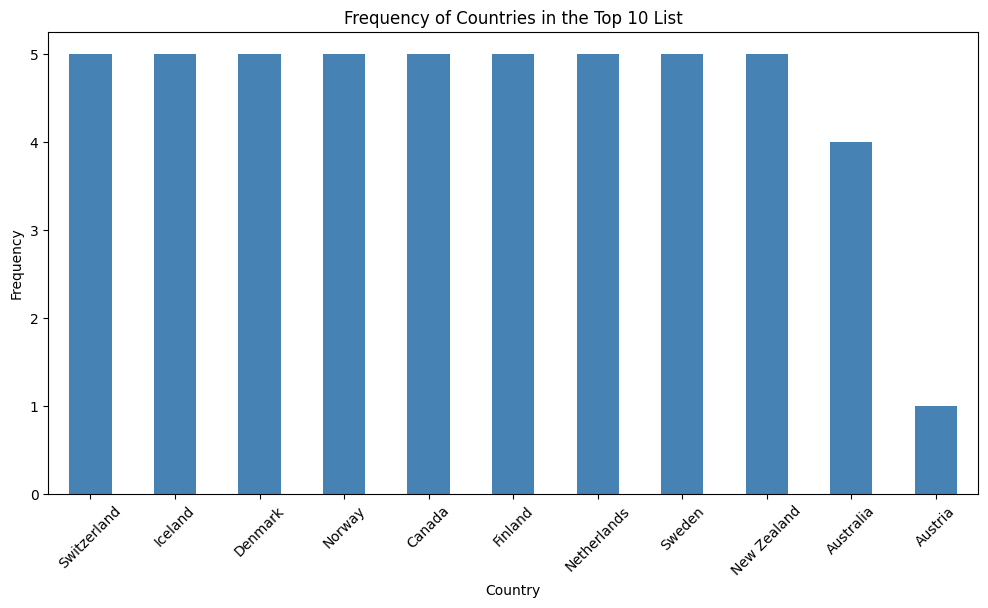

In [ ]:
# Count the frequency of each country in the top 10 list
country_freq = top_10_countries_by_year['Country'].value_counts()

# Plot the frequency of each country in the top 10 list using a bar chart
plt.figure(figsize=(12, 6))
country_freq.plot(kind='bar', color='steelblue')
plt.title('Frequency of Countries in the Top 10 List')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Average score of top 10 happies countries all years

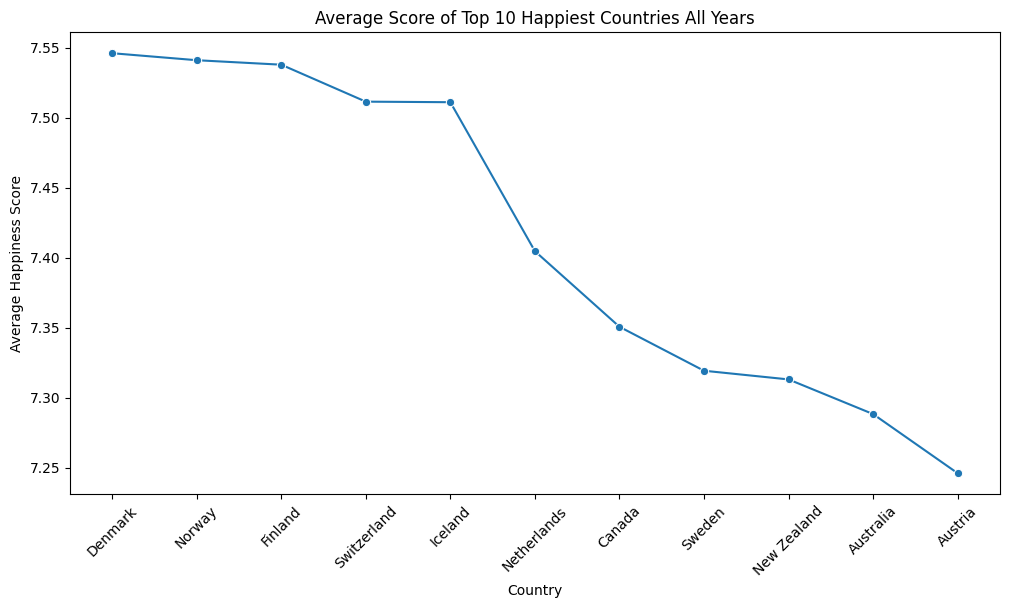

In [ ]:
# Calculate the average score of the top 10 happiest countries all years
avg_score_by_country = top_10_countries_by_year.groupby('Country')['Score'].mean().sort_values(ascending=False)

# Visualize the average score using a line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_score_by_country.index, y=avg_score_by_country.values, marker='o')
plt.title("Average Score of Top 10 Happiest Countries All Years")
plt.xlabel('Country')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45)
plt.show()

### Distribution of GDP, Life Expectancy and Freedom

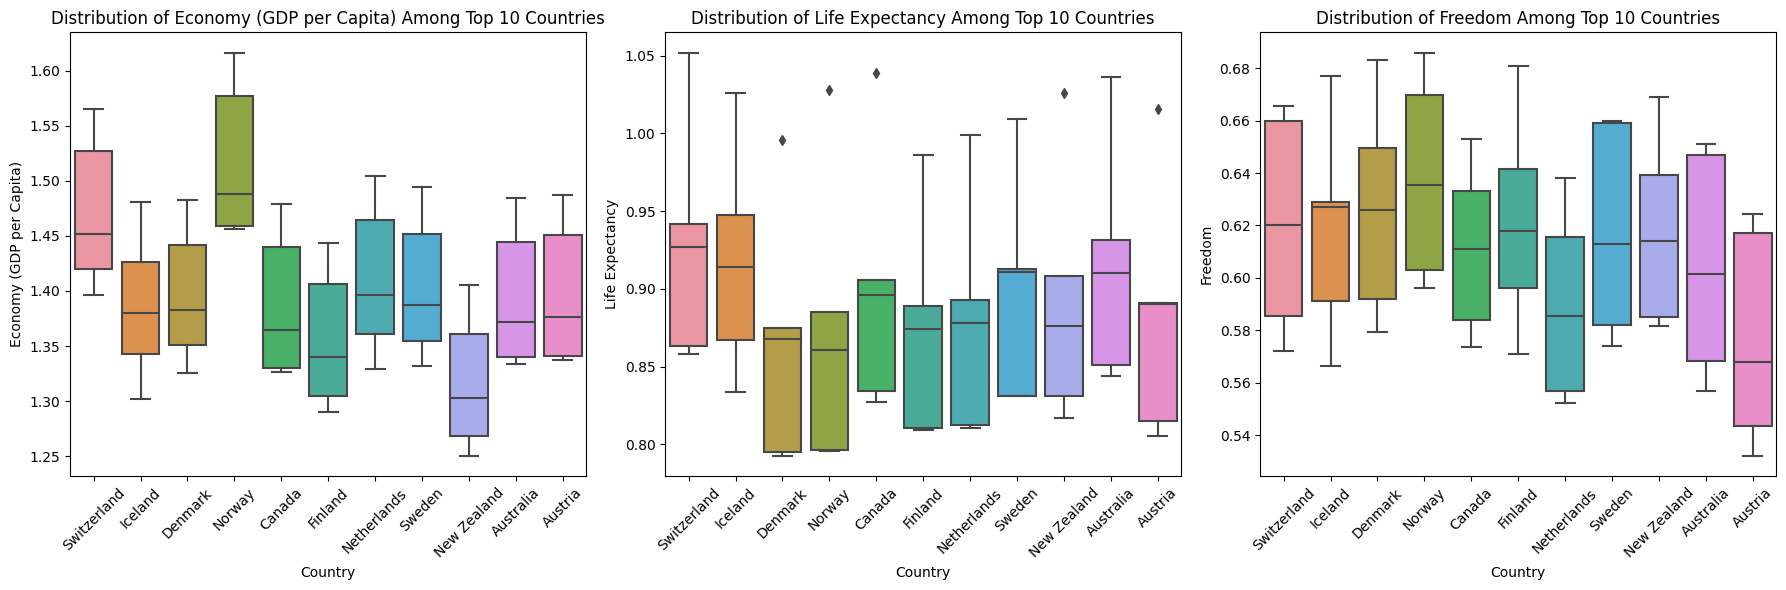

In [ ]:
# Extract the top 10 countries
top_10_countries = top_10_countries_by_year['Country'].unique()

# Filter df_all_years for the top 10 countries
top_10_data = df_all_years[df_all_years['Country'].isin(top_10_countries)]

# Visualize the distribution of GDP per capita, healthy life expectancy, and freedom to make life choices among the top 10 countries
plt.figure(figsize=(18, 6))
features = ['Economy (GDP per Capita)', 'Life Expectancy', 'Freedom']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=feature, data=top_10_data)
    plt.title(f"Distribution of {feature} Among Top 10 Countries")
    plt.xlabel('Country')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Analysis the bottom 10 least happy countries

###  Display the bottom 10 countries

In [ ]:
# Get the bottom 10 least happy countries for each year
bottom_10_countries_by_year = df_all_years.groupby('Year').apply(lambda x: x.nsmallest(10, 'Score')).reset_index(drop=True)

# Display the bottom 10 countries for each year
for year in bottom_10_countries_by_year['Year'].unique():
    print(f"Bottom 10 least happy countries in {int(year)}:")
    print(bottom_10_countries_by_year[bottom_10_countries_by_year['Year'] == year][['Country', 'Score']])
    print("\n")

Bottom 10 least happy countries in 2015:
        Country  Score
0          Togo  2.839
1       Burundi  2.905
2         Syria  3.006
3         Benin  3.340
4        Rwanda  3.465
5   Afghanistan  3.575
6  Burkina Faso  3.587
7   Ivory Coast  3.655
8        Guinea  3.656
9          Chad  3.667


Bottom 10 least happy countries in 2016:
        Country  Score
10      Burundi  2.905
11        Syria  3.069
12         Togo  3.303
13  Afghanistan  3.360
14        Benin  3.484
15       Rwanda  3.515
16       Guinea  3.607
17      Liberia  3.622
18     Tanzania  3.666
19   Madagascar  3.695


Bottom 10 least happy countries in 2017:
                     Country  Score
20  Central African Republic  2.693
21                   Burundi  2.905
22                  Tanzania  3.349
23                     Syria  3.462
24                    Rwanda  3.471
25                      Togo  3.495
26                    Guinea  3.507
27                   Liberia  3.533
28               South Sudan  3.591
29     

### Frequency of these countries

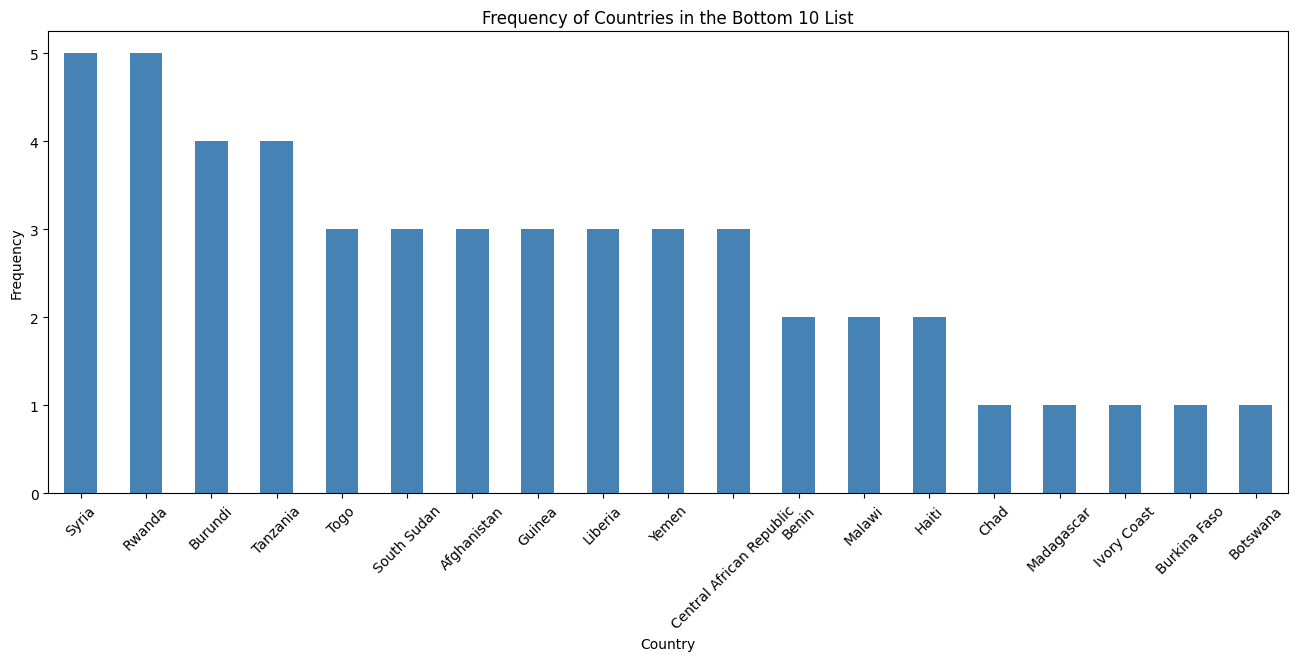

In [ ]:
# Count the frequency of each country in the bottom 10 list
country_bottom_freq = bottom_10_countries_by_year['Country'].value_counts()

# Plot the frequency of each country in the bottom 10 list using a bar chart
plt.figure(figsize=(16, 6))
country_bottom_freq.plot(kind='bar', color='steelblue')
plt.title('Frequency of Countries in the Bottom 10 List')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Average score of top bottom 10 countries all years

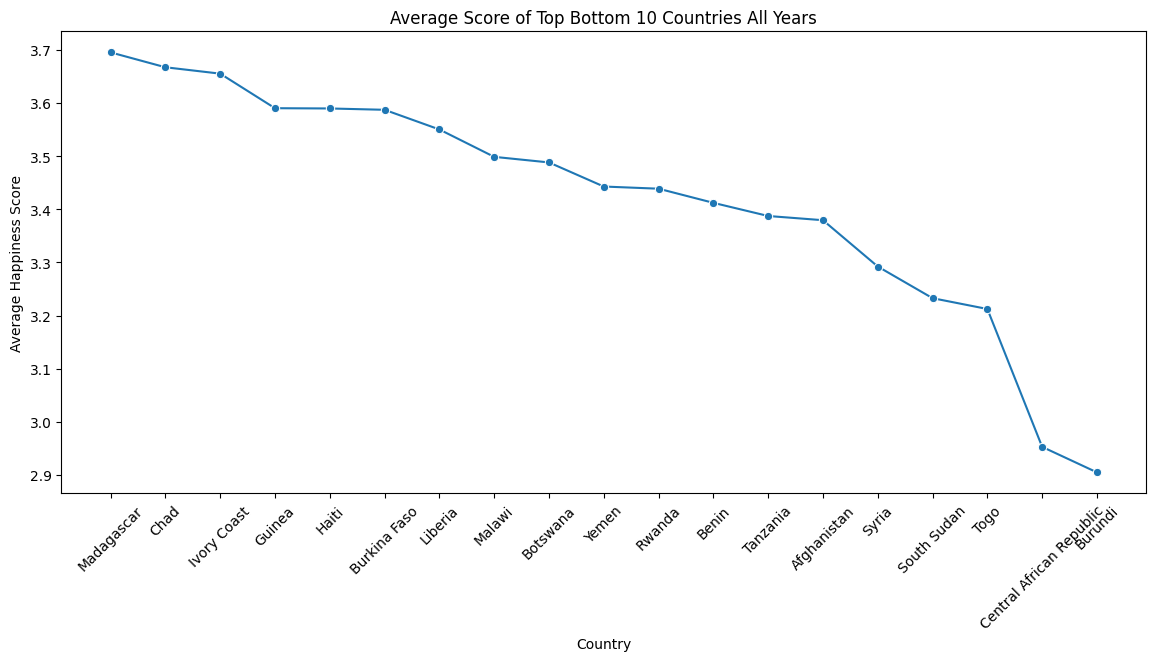

In [ ]:
# Calculate the average score of the top bottom 10 countries all years
avg_score_bottom_country = bottom_10_countries_by_year.groupby('Country')['Score'].mean().sort_values(ascending=False)

# Visualize the average score using a line graph
plt.figure(figsize=(14, 6))
sns.lineplot(x=avg_score_bottom_country.index, y=avg_score_bottom_country.values, marker='o')
plt.title("Average Score of Top Bottom 10 Countries All Years")
plt.xlabel('Country')
plt.ylabel('Average Happiness Score')
plt.xticks(rotation=45)
plt.show()

### Distribution of GDP, Healty Life, Freedom

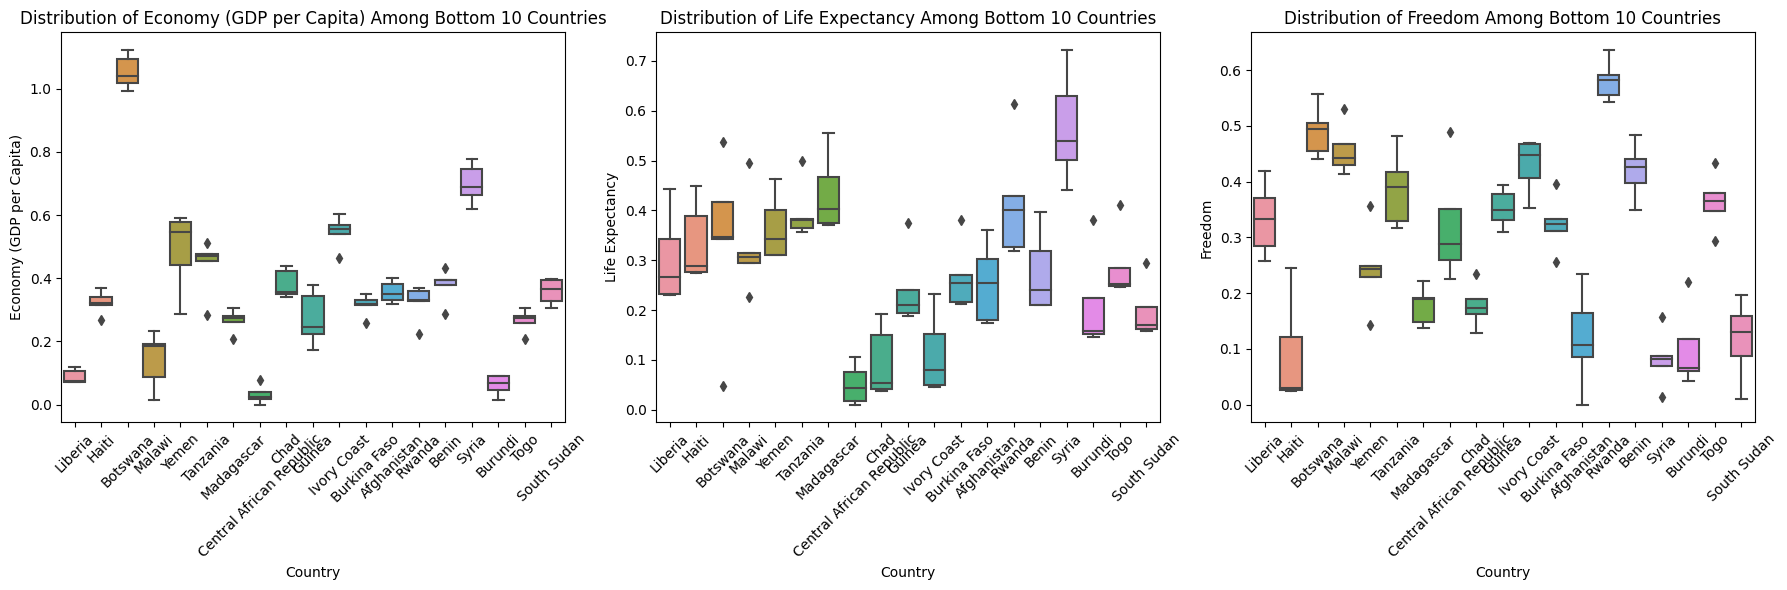

In [ ]:
# Extract the bottom 10 countries
bottom_10_countries = bottom_10_countries_by_year['Country'].unique()

# Filter df_all_years for the bottom 10 countries
bottom_10_data = df_all_years[df_all_years['Country'].isin(bottom_10_countries)]

# Visualize the distribution of GDP per capita, healthy life expectancy, and freedom to make life choices among the bottom 10 countries
plt.figure(figsize=(18, 6))
features = ['Economy (GDP per Capita)', 'Life Expectancy', 'Freedom']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Country', y=feature, data=bottom_10_data)
    plt.title(f"Distribution of {feature} Among Bottom 10 Countries")
    plt.xlabel('Country')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Compare the distribution among top 10 and bottom 10 countries

<ipython-input-23-7ac7983671e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_data['Group'] = 'Top 10'
<ipython-input-23-7ac7983671e3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_data['Group'] = 'Bottom 10'


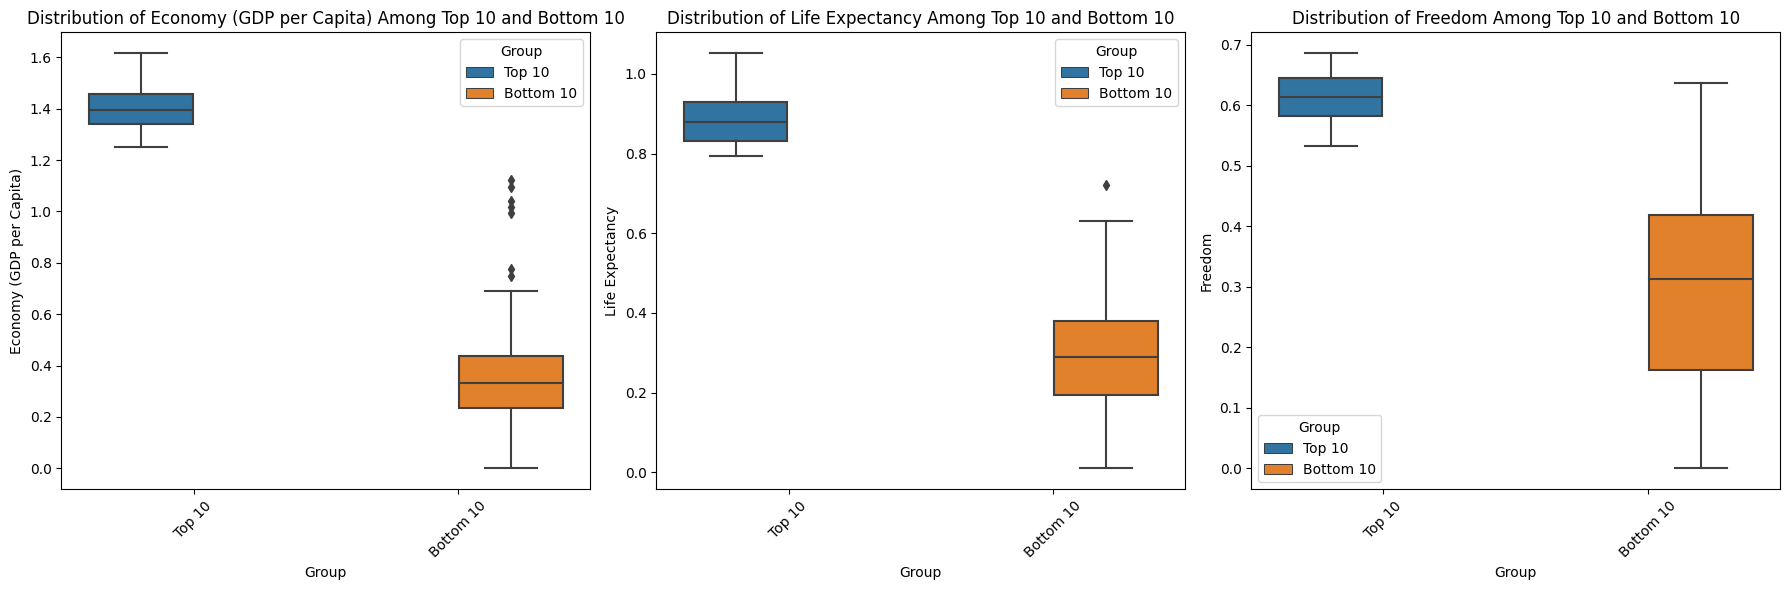

In [ ]:
# Add 'Group' column to both top_10_data and bottom_10_data
top_10_data['Group'] = 'Top 10'
bottom_10_data['Group'] = 'Bottom 10'

# Concatenate top_10_data and bottom_10_data
combined_data = pd.concat([top_10_data, bottom_10_data])

# Visualize the distribution of GDP per capita, healthy life expectancy, and freedom to make life choices among the top 10 and bottom 10 countries
plt.figure(figsize=(18, 6))
features = ['Economy (GDP per Capita)', 'Life Expectancy', 'Freedom']
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Group', y=feature, data=combined_data, hue='Group')
    plt.title(f"Distribution of {feature} Among Top 10 and Bottom 10")
    plt.xlabel('Group')
    plt.ylabel(feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Significant changes in the happiness score

### Find top countries with the most improvement and decline

In [ ]:
# Extract happiness scores for 2015 and 2019
scores_2015 = df_all_years[df_all_years['Year'] == 2015][['Country', 'Score']]
scores_2019 = df_all_years[df_all_years['Year'] == 2019][['Country', 'Score']]

# Merge the two dataframes on the 'Country' column
merged_scores = scores_2015.merge(scores_2019, on='Country', suffixes=('_2015', '_2019'))

# Calculate the difference in happiness scores
merged_scores['Score Difference'] = merged_scores['Score_2019'] - merged_scores['Score_2015']

# Sort the dataframe by score difference
merged_scores = merged_scores.sort_values(by='Score Difference', ascending=False)

# Display the top 5 countries with the most improvement
print("Top 5 countries with the most improvement:")
print(merged_scores.head(5))

# Display the top 5 countries with the most decline
print("\nTop 5 countries with the most decline:")
print(merged_scores.tail(5))

Top 5 countries with the most improvement:
          Country  Score_2015  Score_2019  Score Difference
145         Benin       3.340       4.883             1.543
141   Ivory Coast       3.655       4.944             1.289
148          Togo       2.839       4.085             1.246
98       Honduras       4.788       5.860             1.072
142  Burkina Faso       3.587       4.587             1.000

Top 5 countries with the most decline:
       Country  Score_2015  Score_2019  Score Difference
111      Haiti       4.518       3.597            -0.921
108   Zimbabwe       4.610       3.663            -0.947
80      Zambia       5.129       4.107            -1.022
90     Lesotho       4.898       3.802            -1.096
21   Venezuela       6.810       4.707            -2.103


### Calculate the changes in each factor

In [ ]:
# Get the lists of countries with the most improvement and decline
top_improvement_countries = merged_scores.head(5)['Country'].tolist()
top_decline_countries = merged_scores.tail(5)['Country'].tolist()

# Extract data for the countries with the most improvement and decline
improvement_data = df_all_years[(df_all_years['Year'].isin([2015, 2019])) & (df_all_years['Country'].isin(top_improvement_countries))]
decline_data = df_all_years[(df_all_years['Year'].isin([2015, 2019])) & (df_all_years['Country'].isin(top_decline_countries))]

# Calculate the changes in each factor
factor_columns = ['Score', 'Economy (GDP per Capita)', 'Life Expectancy', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
improvement_changes = improvement_data.groupby(['Country', 'Year'])[factor_columns].mean().unstack().diff(axis=1)
improvement_changes = improvement_changes.loc[:, pd.IndexSlice[:, 2019]]

decline_changes = decline_data.groupby(['Country', 'Year'])[factor_columns].mean().unstack().diff(axis=1)
decline_changes = decline_changes.loc[:, pd.IndexSlice[:, 2019]]

# Display the changes in factors for the countries with the most improvement
print("Changes in factors for the countries with the most improvement:")
print(improvement_changes)

# Display the changes in factors for the countries with the most decline
print("\nChanges in factors for the countries with the most decline:")
print(decline_changes)

Changes in factors for the countries with the most improvement:
              Score Economy (GDP per Capita) Life Expectancy  Freedom  \
Year           2019                     2019            2019     2019   
Country                                                                 
Benin         1.543                  0.10635         0.07790 -0.13550   
Burkina Faso  1.000                  0.07288         0.10875 -0.13993   
Honduras      1.072                  0.04668         0.13290  0.10552   
Ivory Coast   1.289                  0.10366         0.08015 -0.11666   
Togo          1.246                  0.06632         0.12557 -0.07153   

             Trust (Government Corruption) Generosity  
Year                                  2019       2019  
Country                                                
Benin                              0.00190   -0.00760  
Burkina Faso                      -0.01532   -0.04047  
Honduras                           0.00975    0.01573  
Ivory Coast    

### Visualize the changes

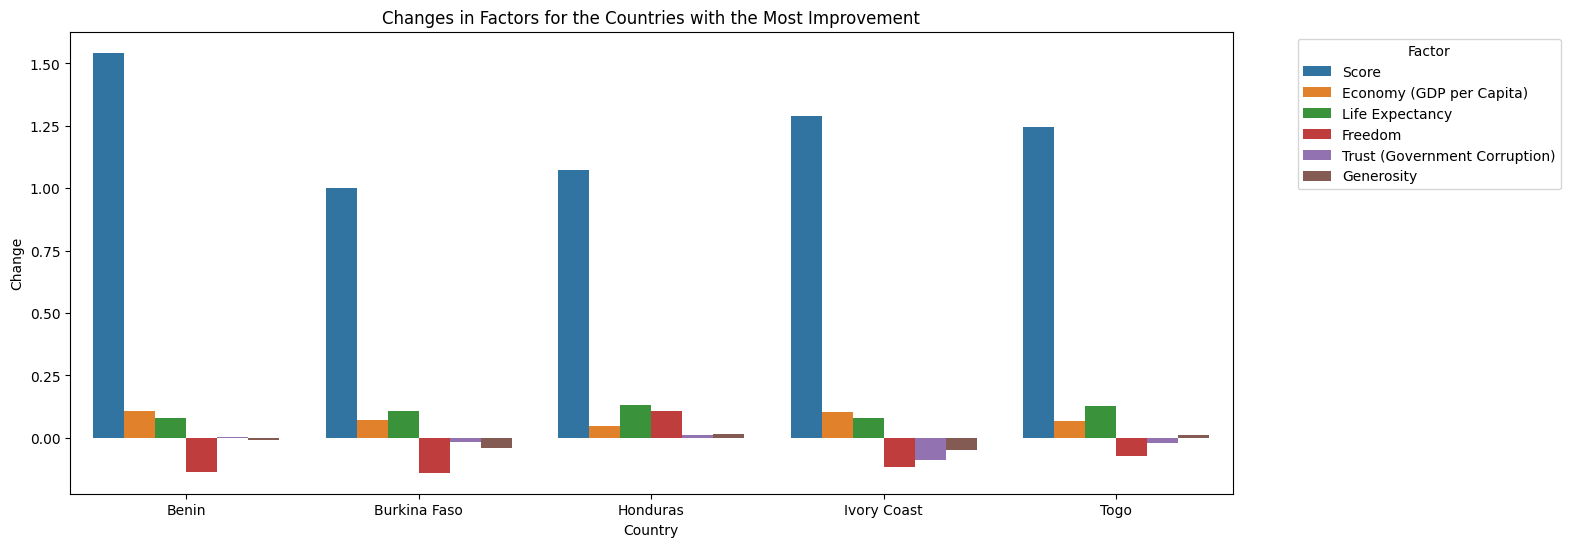

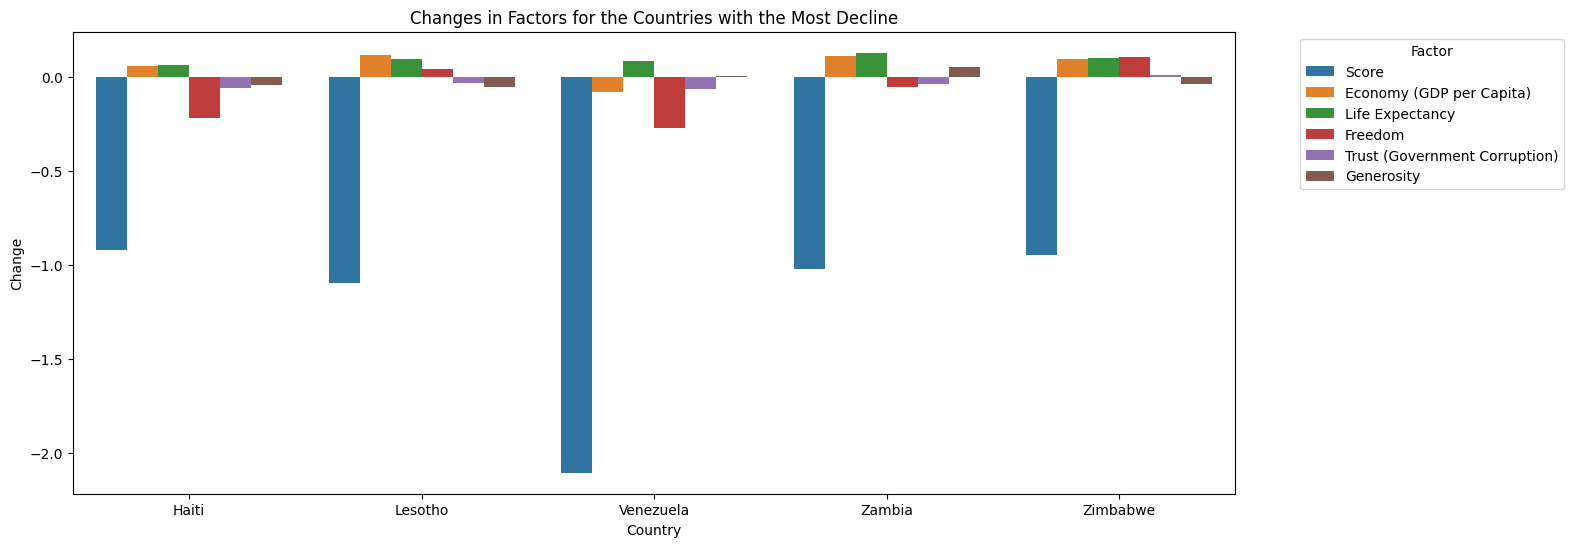

In [ ]:
# Reset the column levels after slicing
improvement_changes.columns = improvement_changes.columns.droplevel(1)
decline_changes.columns = decline_changes.columns.droplevel(1)

# Melt the dataframes to get them in long format
improvement_changes_melted = improvement_changes.reset_index().melt(id_vars='Country', var_name='Factor', value_name='Change')
decline_changes_melted = decline_changes.reset_index().melt(id_vars='Country', var_name='Factor', value_name='Change')

# Plot the changes in factors for the countries with the most improvement
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Change', hue='Factor', data=improvement_changes_melted)
plt.title('Changes in Factors for the Countries with the Most Improvement')
plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plot the changes in factors for the countries with the most decline
plt.figure(figsize=(15, 6))
sns.barplot(x='Country', y='Change', hue='Factor', data=decline_changes_melted)
plt.title('Changes in Factors for the Countries with the Most Decline')
plt.legend(title='Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Training Model

## Building model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Filter the data
train_data = df_all_years[df_all_years['Year'] < 2019]
test_data = df_all_years[df_all_years['Year'] == 2019]

# Define feature and target columns
feature_columns = ['Economy (GDP per Capita)', 'Life Expectancy', 'Freedom', 'Trust (Government Corruption)', 'Generosity']
target_column = 'Score'

# Prepare the training and testing sets
X_train = train_data[feature_columns]
y_train = train_data[target_column]
X_test = test_data[feature_columns]
y_test = test_data[target_column]

# Create the linear regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

# Calculate the mean squared error, R2 score, Mean Absolute Error, Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean squared error: {mse:.2f}")
print(f"R2 score: {r2:.2f}")

Mean Absolute Error: 0.44
Root Mean Squared Error: 0.56
Mean squared error: 0.32
R2 score: 0.74


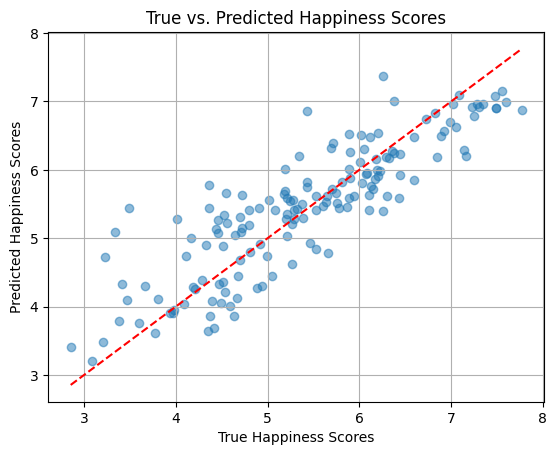

In [ ]:
# Scatter plot of true vs. predicted happiness scores
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Happiness Scores")
plt.ylabel("Predicted Happiness Scores")

# Add a line for perfect predictions
min_value = np.minimum(y_test.min(), y_pred.min())
max_value = np.maximum(y_test.max(), y_pred.max())
plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')

# Show the plot
plt.title("True vs. Predicted Happiness Scores")
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

# Prepare the training set with an added constant
X2_train = sm.add_constant(X_train)

# Train the model
model_stats = sm.OLS(y_train, X2_train).fit()

# Display the summary
print(model_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     362.3
Date:                Fri, 05 May 2023   Prob (F-statistic):          2.80e-181
Time:                        03:01:46   Log-Likelihood:                -537.52
No. Observations:                 626   AIC:                             1087.
Df Residuals:                     620   BIC:                             1114.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## Test with specific country

In [ ]:
# Extract the feature values for the United States in 2018
us_2018_features = df_all_years[(df_all_years['Country'] == 'United States') & (df_all_years['Year'] == 2018)][feature_columns].values

# Assuming 'X' is the feature matrix for your dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardize the features
us_2018_features_scaled = scaler.transform(us_2018_features)

# Predict the happiness score for the United States in 2019 using the trained linear regression model
us_2019_predicted_score = lr.predict(us_2018_features_scaled)

# Extract the true happiness score for the United States in 2019
us_2019_true_score = df_all_years[(df_all_years['Country'] == 'United States') & (df_all_years['Year'] == 2019)]['Score'].values[0]

# Compare the predicted and true happiness scores for the United States in 2019
print("Predicted happiness score for the United States in 2019:", us_2019_predicted_score[0])
print("True happiness score for the United States in 2019:", us_2019_true_score)


Predicted happiness score for the United States in 2019: 7.070315415710592
True happiness score for the United States in 2019: 6.892


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
